In [1]:
# libraries

using LinearAlgebra
using Random
using StatsBase
using Statistics
using Plots

# 6.2. Logistic regression

Let the data pairs $(a_i, b_i)\in\mathbb{R}^n\times\{\pm1\}$, and we wish to minimize

$$\begin{align*}
    F(x) := \dfrac{1}{m}\sum_{i = 1}^m f(x;(a_i, b_i)),
\end{align*}$$

where $f(x;(a_i, b_i)) = \log\left(1 + e^{-b\langle a, x\rangle}\right)$.

The data is generated as follows: sample $a_i\overset{\text{iid}}{\sim} N(0, I_n)$ and $u^\star\sim N(0, I_n)$, labeling $b_i = \text{sign}(\langle a_i, u^\star\rangle)$. In noisy setting each label's sign independently with probability $p$.

In [2]:
# sample generation

function matrix_gen(
    m  :: Int,
    n  :: Int,
    p :: Real, # noise?
    κ :: Real  # condition number
    )
    # generate b_i = sign(<a_i, u^\star>) where cond(A) = κ

    u_opt = randn(n)

    A = zeros(m, n)
    
    b1 = zeros(m); b2 = zeros(m)
    
    wv = aweights([p, 1-p])
    
    for i = 1:m
        
        Ai = randn(n)
        
        A[i,:] = Ai
        
        bi = sign(Ai'u_opt)
        
        b1[i] = bi
        
        b2[i] = sample([-1, 1], wv) * bi
        
    end
    
    return A, b1, b2, u_opt
    
end

matrix_gen (generic function with 1 method)

# Figure 4 (a)

$m = 1000, n = 40, \kappa(A) = 1, p = 0$.

In [3]:
# Generate data, define the objective function, and set parameters

Random.seed!(304)

# without/with noise & condition number 1
X, y, y2, x = matrix_gen(1000, 40, 0.01, 1)

m, n = size(X)

# the objective function
function F(θ)
    sum(log.(1 .+ exp.(-y .* (X*θ)))) / m
end

function F2(θ)
    sum(log.(1 .+ exp.(-y2 .* (X*θ)))) / m
end

# optimal value
Fstar = F(x)
Fstar2 = F2(x)

# parameter setting
T = 100 # # of experiments
K = 1e3 # total iterations
γinits = exp.(collect(range(log(10^(-2)), log(10^5), length = 15)))
ϵ = 0.05 # tolerance
ϵ_bisection = 1e-02
β = 0.6 # exponent of step size

0.6

In [4]:
# experiments for SGM (Figure 4 (a))

# initialization
iterations_SGM = zeros(T, 15)

# main iteration
for i = 1:15
    for j = 1:T
        γinit = γinits[i]
        θ = 0.5 * x#zeros(n)
        for k = 1:K
            idx = sample(1:m) # sampling
            γ = γinit * k^(-β) # update stepsize
            
            # SGM update
            yXθ = exp(-y[idx] * (X[idx,:]'θ))
            θ = θ + (γ * (y[idx] * yXθ / (1 + yXθ))) * X[idx,:]
            
            if (abs(F(θ) - Fstar) <= ϵ || k >= K)
                #println(F(θ))
                iterations_SGM[j, i] = k
                break
            end                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
        end
    end
end

In [5]:
sgm_iters = [[quantile(iterations_SGM[:,i], 0.05) for i = 1:15] median(iterations_SGM, dims = 1)' [quantile(iterations_SGM[:,i], 0.95) for i = 1:15]]

15×3 Array{Float64,2}:
 1000.0   1000.0  1000.0
 1000.0   1000.0  1000.0
 1000.0   1000.0  1000.0
 1000.0   1000.0  1000.0
  408.8    598.0   859.4
  381.6    575.5  1000.0
  661.95  1000.0  1000.0
 1000.0   1000.0  1000.0
 1000.0   1000.0  1000.0
 1000.0   1000.0  1000.0
 1000.0   1000.0  1000.0
 1000.0   1000.0  1000.0
 1000.0   1000.0  1000.0
 1000.0   1000.0  1000.0
 1000.0   1000.0  1000.0

In [6]:
# experiments for the truncated model (Figure 4 (a))

# initialization
iterations_truncated = zeros(T, 15)

# main iteration
for i = 1:15
    for j = 1:T
        γinit = γinits[i]
        θ = 0.5 * x
        for k = 1:K
            idx = sample(1:m) # sampling
            γ = γinit * k^(-β) # update stepsize
            
            # Update for the truncated model
            yXθ = exp(-y[idx] * (X[idx,:]'θ))
            ∇f = (-y[idx] * yXθ / (1 + yXθ)) * X[idx,:]
            θ = θ -  min(γ, log(1 + yXθ)/norm(∇f)^2)*∇f
            
            if (abs(F(θ) - Fstar) <= ϵ || k >= K)
                #println(F(θ))
                iterations_truncated[j, i] = k
                break
            end
        end
    end
end

In [7]:
trunc_iters = [[quantile(iterations_truncated[:,i], 0.05) for i = 1:15] median(iterations_truncated, dims = 1)' [quantile(iterations_truncated[:,i], 0.95) for i = 1:15]]

15×3 Array{Float64,2}:
 1000.0   1000.0  1000.0 
 1000.0   1000.0  1000.0 
 1000.0   1000.0  1000.0 
 1000.0   1000.0  1000.0 
  443.95   562.0   710.3 
  277.9    410.0   570.05
  271.7    390.0   616.15
  254.05   404.5   610.0 
  170.95   375.5   680.6 
  204.5    418.0   645.15
  158.9    386.0   766.05
  209.65   417.5   776.05
  168.95   473.0   867.15
  205.7    441.0   786.7 
  162.4    413.0   913.1 

In [8]:
# experiments for the proximal model (Figure 4 (a))

function f(x, xk, a, b, α)
    return log(1 + exp(-b * (a'x))) + norm(x - xk)^2 / 2 / α
end

# initialization
iterations_proximal = zeros(T, 15)

# main iteration
for i = 1:15
    for j = 1:T
        println("start i = ", i, " and j = ", j)
        γinit = γinits[i]
        θ = 0.5 * x
        for k = 1:K
            idx = sample(1:m) # sampling
            γ = γinit * k^(-β) # update stepsize
            
            Xidx = X[idx,:]; yidx = y[idx]
            
            # Update for the proximal model
            yXθ = exp(-yidx * (Xidx'θ))
            Δx = (γ * (yidx * yXθ / (1 + yXθ))) * Xidx
            
            searchs = [f(θ + l/1000 * Δx, θ, Xidx, yidx, γ) for l = 1:1000]
            
            θ = θ + (findmin(searchs)[2])/1000 * Δx
            
            if (abs(F(θ) - Fstar) <= ϵ || k >= K)
                #println(abs(F(θ) - Fstar))
                iterations_proximal[j, i] = k
                break
            end
        end
    end
end

start i = 1 and j = 1
0.0770142861692477
start i = 1 and j = 2
0.07691738759750015
start i = 1 and j = 3
0.07701537027431761
start i = 1 and j = 4
0.0769728638810079
start i = 1 and j = 5
0.07688308291655783
start i = 1 and j = 6
0.07663304191354807
start i = 1 and j = 7
0.07667369209728485
start i = 1 and j = 8
0.07729086864370481
start i = 1 and j = 9
0.0768373883950504
start i = 1 and j = 10
0.07689871777303096
start i = 1 and j = 11
0.07694588633051734
start i = 1 and j = 12
0.07704470890470706
start i = 1 and j = 13
0.07740971359703215
start i = 1 and j = 14
0.07711179764939864
start i = 1 and j = 15
0.07680825105236487
start i = 1 and j = 16
0.07691705776336848
start i = 1 and j = 17
0.07723847898992796
start i = 1 and j = 18
0.07695083895010098
start i = 1 and j = 19
0.07707108942301437
start i = 1 and j = 20
0.07679646391036592
start i = 1 and j = 21
0.07698226596643902
start i = 1 and j = 22
0.07686556670663001
start i = 1 and j = 23
0.07702322769224289
start i = 1 and j = 24


0.07461858479904689
start i = 2 and j = 94
0.07448545012675765
start i = 2 and j = 95
0.07405178491348928
start i = 2 and j = 96
0.07503382999387069
start i = 2 and j = 97
0.07453750901882407
start i = 2 and j = 98
0.07473278460712736
start i = 2 and j = 99
0.0751940755907158
start i = 2 and j = 100
0.07495483954787936
start i = 3 and j = 1
0.07049041509436375
start i = 3 and j = 2
0.0693231762768897
start i = 3 and j = 3
0.06851151506841884
start i = 3 and j = 4
0.07013041040863636
start i = 3 and j = 5
0.0698223970427742
start i = 3 and j = 6
0.06971162365349791
start i = 3 and j = 7
0.06994806520838044
start i = 3 and j = 8
0.06794467710748807
start i = 3 and j = 9
0.06921046979365693
start i = 3 and j = 10
0.0700952599243657
start i = 3 and j = 11
0.070064812082908
start i = 3 and j = 12
0.0692341767433763
start i = 3 and j = 13
0.06915509034178506
start i = 3 and j = 14
0.0693246109466422
start i = 3 and j = 15
0.07001694686557895
start i = 3 and j = 16
0.06953668463143285
start i

0.06077453480659677
start i = 4 and j = 85
0.059888163082041965
start i = 4 and j = 86
0.059907176214118854
start i = 4 and j = 87
0.05850394238889718
start i = 4 and j = 88
0.05865810812483764
start i = 4 and j = 89
0.060371265771961544
start i = 4 and j = 90
0.05985948907781387
start i = 4 and j = 91
0.05971120544260548
start i = 4 and j = 92
0.05980470402134451
start i = 4 and j = 93
0.05889903918397392
start i = 4 and j = 94
0.05823591467310325
start i = 4 and j = 95
0.05899519139417021
start i = 4 and j = 96
0.059857335082853194
start i = 4 and j = 97
0.06215899620120845
start i = 4 and j = 98
0.05741975054352201
start i = 4 and j = 99
0.06046838090618829
start i = 4 and j = 100
0.05772951027072755
start i = 5 and j = 1
0.04960662249124105
start i = 5 and j = 2
0.04951249078883131
start i = 5 and j = 3
0.049933877328451545
start i = 5 and j = 4
0.04989463029225606
start i = 5 and j = 5
0.049960343989706626
start i = 5 and j = 6
0.0491607626088653
start i = 5 and j = 7
0.0498806662

0.04998672001327227
start i = 6 and j = 75
0.04951942790263063
start i = 6 and j = 76
0.049991418853370315
start i = 6 and j = 77
0.0482758597550801
start i = 6 and j = 78
0.049988819675077276
start i = 6 and j = 79
0.04919821212590435
start i = 6 and j = 80
0.049712473578455305
start i = 6 and j = 81
0.0499722452212578
start i = 6 and j = 82
0.047895601549239344
start i = 6 and j = 83
0.04999634918426961
start i = 6 and j = 84
0.04503912076961268
start i = 6 and j = 85
0.049959079370559725
start i = 6 and j = 86
0.04827329513271346
start i = 6 and j = 87
0.04787033393142896
start i = 6 and j = 88
0.04810517810246247
start i = 6 and j = 89
0.049490024840627436
start i = 6 and j = 90
0.0490449416861458
start i = 6 and j = 91
0.049598254079242385
start i = 6 and j = 92
0.04983317178124351
start i = 6 and j = 93
0.049281492771278926
start i = 6 and j = 94
0.0477190298155392
start i = 6 and j = 95
0.049446657778992806
start i = 6 and j = 96
0.04953264960228014
start i = 6 and j = 97
0.0499

0.048773739993257084
start i = 8 and j = 65
0.0499507680857703
start i = 8 and j = 66
0.04880799075829097
start i = 8 and j = 67
0.04915621228447105
start i = 8 and j = 68
0.04795972310214676
start i = 8 and j = 69
0.049274438986439614
start i = 8 and j = 70
0.04902888104256388
start i = 8 and j = 71
0.048905622135129875
start i = 8 and j = 72
0.04750239364354496
start i = 8 and j = 73
0.04846836883413007
start i = 8 and j = 74
0.04793048766124895
start i = 8 and j = 75
0.047843597021330994
start i = 8 and j = 76
0.04958912921515267
start i = 8 and j = 77
0.047744146312313676
start i = 8 and j = 78
0.04892554825139599
start i = 8 and j = 79
0.0498815681362529
start i = 8 and j = 80
0.049804059851929414
start i = 8 and j = 81
0.04210650575427417
start i = 8 and j = 82
0.04929354978181262
start i = 8 and j = 83
0.04745064402513614
start i = 8 and j = 84
0.04825767202397817
start i = 8 and j = 85
0.04915641439006803
start i = 8 and j = 86
0.04623529385526108
start i = 8 and j = 87
0.03274

0.046955001074047
start i = 10 and j = 54
0.042263316413520394
start i = 10 and j = 55
0.04721249391774239
start i = 10 and j = 56
0.04911062191939909
start i = 10 and j = 57
0.03885835702204514
start i = 10 and j = 58
0.04332840846526752
start i = 10 and j = 59
0.04110612846315971
start i = 10 and j = 60
0.04897649655953089
start i = 10 and j = 61
0.04118579632455584
start i = 10 and j = 62
0.03344369110312663
start i = 10 and j = 63
0.04719442872280978
start i = 10 and j = 64
0.04578508067320468
start i = 10 and j = 65
0.0496702174559273
start i = 10 and j = 66
0.04862524488354668
start i = 10 and j = 67
0.04143150737872246
start i = 10 and j = 68
0.041143691756097514
start i = 10 and j = 69
0.04594266085233793
start i = 10 and j = 70
0.0463974454356421
start i = 10 and j = 71
0.049465991570582
start i = 10 and j = 72
0.025915652369110823
start i = 10 and j = 73
0.045050401290651756
start i = 10 and j = 74
0.029538543653211194
start i = 10 and j = 75
0.040915408852413834
start i = 10

0.04684710211750277
start i = 12 and j = 40
0.021996616712762526
start i = 12 and j = 41
0.04916941305590182
start i = 12 and j = 42
0.04793151329925714
start i = 12 and j = 43
0.04116713225524406
start i = 12 and j = 44
0.045818827344085725
start i = 12 and j = 45
0.04837203783051332
start i = 12 and j = 46
0.09805139101601058
start i = 12 and j = 47
0.06696080743943565
start i = 12 and j = 48
0.07639438043330342
start i = 12 and j = 49
0.0447707807195276
start i = 12 and j = 50
0.08143103793504396
start i = 12 and j = 51
0.0363770741859759
start i = 12 and j = 52
0.049487960903394065
start i = 12 and j = 53
0.03153519665468342
start i = 12 and j = 54
0.034649765999959614
start i = 12 and j = 55
0.08022871641539568
start i = 12 and j = 56
0.04144002126181352
start i = 12 and j = 57
0.08702436876031557
start i = 12 and j = 58
0.046654671161341185
start i = 12 and j = 59
0.04239883555753769
start i = 12 and j = 60
0.04570998785316539
start i = 12 and j = 61
0.10477389275321213
start i =

0.2293169835551065
start i = 14 and j = 27
0.22053161145594252
start i = 14 and j = 28
0.12687014227335297
start i = 14 and j = 29
0.3708358553100379
start i = 14 and j = 30
0.15919475888119455
start i = 14 and j = 31
0.1790097551160778
start i = 14 and j = 32
0.18546216691524203
start i = 14 and j = 33
0.2368922756199866
start i = 14 and j = 34
0.4547609699438956
start i = 14 and j = 35
0.570426334722114
start i = 14 and j = 36
0.4530791550022061
start i = 14 and j = 37
0.16209008248019002
start i = 14 and j = 38
0.2013363611764537
start i = 14 and j = 39
0.1937848168677319
start i = 14 and j = 40
0.4454296373760568
start i = 14 and j = 41
0.26963449244114646
start i = 14 and j = 42
0.559638110293073
start i = 14 and j = 43
0.4238684439622873
start i = 14 and j = 44
0.6507137667941963
start i = 14 and j = 45
0.34617677549432574
start i = 14 and j = 46
0.3793083295654526
start i = 14 and j = 47
0.4014228107133466
start i = 14 and j = 48
0.2811379741822466
start i = 14 and j = 49
0.4540

In [9]:
prox_iters = [[quantile(iterations_proximal[:,i], 0.05) for i = 1:15] median(iterations_proximal, dims = 1)' [quantile(iterations_proximal[:,i], 0.95) for i = 1:15]]

15×3 Array{Float64,2}:
 1000.0   1000.0  1000.0 
 1000.0   1000.0  1000.0 
 1000.0   1000.0  1000.0 
 1000.0   1000.0  1000.0 
  543.8    676.5   862.25
  295.6    423.0   543.4 
  273.85   387.0   543.55
  279.6    432.5   570.35
  333.7    499.5   680.55
  370.25   574.0   825.3 
  434.2    711.5   919.8 
  441.3    772.0  1000.0 
  680.35   980.0  1000.0 
 1000.0   1000.0  1000.0 
 1000.0   1000.0  1000.0 

In [10]:
# experiments for the bundle model (Figure 4 (a))

# initialization
iterations_bundle = zeros(T, 15)

# main iteration
for i = 1:15
    for j = 1:T
        γinit = γinits[i]
        θ = 0.5 * x
        for k = 1:K
            idx = sample(1:m) # sampling
            γ = γinit * k^(-β) # update stepsize
            
            # Update for the bundle model
            yXθ = exp(-y[idx] * (X[idx,:]'θ))
            ∇fθ = (-y[idx] * yXθ / (1 + yXθ)) * X[idx,:]
            fθ = log(1 + yXθ)
            θy = θ - γ*∇fθ
            
            yXθy = exp(-y[idx] * (X[idx,:]'θy))
            ∇fθy = (-y[idx] * yXθy / (1 + yXθy)) * X[idx,:]
            fθy = log(1 + yXθy)
            θ̄ = θ - γ*∇fθy
            if fθ + ∇fθ'*(θ̄-θ) <= fθy + ∇fθy'*(θ̄-θy)
                θ = θ̄
            else
                λ = (fθy-fθ+γ*norm(∇fθ)^2)/(γ*norm(∇fθy-∇fθ)^2)
                θ -= γ*( (1-λ)*∇fθ + λ*∇fθy  )
            end
            
            if (abs(F(θ) - Fstar) <= ϵ || k >= K)
                #println(F(θ))
                iterations_bundle[j, i] = k
                break
            end
        end
    end
end

In [11]:
bund_iters = [[quantile(iterations_bundle[:,i], 0.05) for i = 1:15] median(iterations_bundle, dims = 1)' [quantile(iterations_bundle[:,i], 0.95) for i = 1:15]]

15×3 Array{Float64,2}:
 1000.0   1000.0  1000.0 
 1000.0   1000.0  1000.0 
 1000.0   1000.0  1000.0 
 1000.0   1000.0  1000.0 
  568.3    733.0   912.1 
  311.7    414.5   550.05
  262.8    397.0   559.45
  231.7    361.5   616.3 
  216.45   371.0   618.25
  203.8    394.5   625.75
  215.85   413.5   663.1 
  226.25   402.5   695.3 
  175.55   376.0   798.0 
  232.4    422.5   757.25
  182.75   434.5   934.45

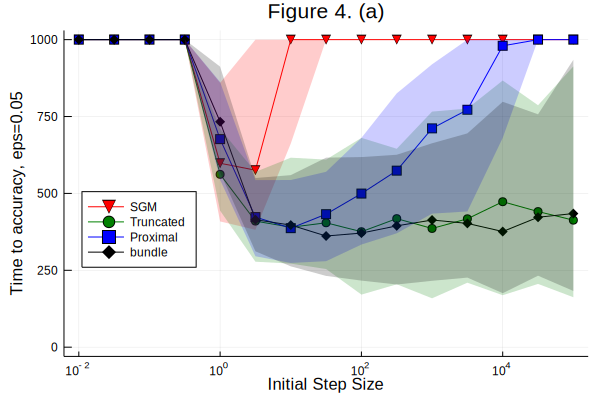

In [12]:
plt = plot(γinits, [sgm_iters[:,2] trunc_iters[:, 2] prox_iters[:, 2] bund_iters[:, 2]], 
    legend = :left,
    xscale = :log10,
    xlab = "Initial Step Size",
    ylab = "Time to accuracy, eps=0.05",
    title = "Figure 4. (a)",
    label = ["SGM" "Truncated" "Proximal" "bundle"],
    color = [:red :green :blue :black],
    markershape = [:dtriangle :circle :square :diamond],
    ylim = [0, 1000])
a = Shape([γinits; γinits],
    [sgm_iters[:,1]; sgm_iters[:,3]])
plot!(a, fillalpha = 0.2, linecolor = nothing, fillcolor = :red, label = "")
b = Shape([γinits; γinits[end:-1:2]],
    [trunc_iters[:,1]; trunc_iters[end:-1:2,3]])
plot!(b, fillalpha = 0.2, linecolor = nothing, fillcolor = :green, label = "")
c = Shape([γinits; γinits[end:-1:2]],
    [prox_iters[:,1]; prox_iters[end:-1:2,3]])
plot!(c, fillalpha = 0.2, linecolor = nothing, fillcolor = :blue, label = "")
d = Shape([γinits; γinits[end:-1:1]],
    [bund_iters[:,1]; bund_iters[end:-1:1,3]])
plot!(d, fillalpha = 0.2, linecolor = nothing, fillcolor = :black, label = "")

# Figure 4 (b)

$m = 1000, n = 40, \kappa(A) = 1, p = 0.01$.

In [13]:
abs(F2(0.45 * x) - Fstar2)

0.05242106741956595

In [14]:
# experiments for SGM (Figure 4 (b))

# initialization
iterations_SGM = zeros(T, 15)

# main iteration
for i = 1:15
    for j = 1:T
        γinit = γinits[i]
        θ = 0.45 * x#zeros(n)
        for k = 1:K
            idx = sample(1:m) # sampling
            γ = γinit * k^(-β) # update stepsize
            
            # SGM update
            yXθ = exp(-y2[idx] * (X[idx,:]'θ))
            θ = θ + (γ * (y2[idx] * yXθ / (1 + yXθ))) * X[idx,:]
            
            if (abs(F2(θ) - Fstar2) <= ϵ || k >= K)
                #println(F2(θ))
                iterations_SGM[j, i] = k
                break
            end                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
        end
    end
end

In [15]:
sgm_iters = [[quantile(iterations_SGM[:,i], 0.05) for i = 1:15] median(iterations_SGM, dims = 1)' [quantile(iterations_SGM[:,i], 0.95) for i = 1:15]]

15×3 Array{Float64,2}:
 1000.0   1000.0  1000.0 
  159.55   476.0  1000.0 
   12.9    116.0   459.1 
   39.65   283.0   898.25
  245.2    414.5   823.7 
  476.9    911.5  1000.0 
 1000.0   1000.0  1000.0 
 1000.0   1000.0  1000.0 
 1000.0   1000.0  1000.0 
 1000.0   1000.0  1000.0 
 1000.0   1000.0  1000.0 
 1000.0   1000.0  1000.0 
 1000.0   1000.0  1000.0 
 1000.0   1000.0  1000.0 
 1000.0   1000.0  1000.0 

In [16]:
# experiments for the truncated model (Figure 4 (b))

# initialization
iterations_truncated = zeros(T, 15)

# main iteration
for i = 1:15
    for j = 1:T
        γinit = γinits[i]
        θ = 0.45 * x
        for k = 1:K
            idx = sample(1:m) # sampling
            γ = γinit * k^(-β) # update stepsize
            
            # Update for the truncated model
            yXθ = exp(-y2[idx] * (X[idx,:]'θ))
            ∇f2 = (-y2[idx] * yXθ / (1 + yXθ)) * X[idx,:]
            θ = θ -  min(γ, log(1 + yXθ)/norm(∇f2)^2)*∇f2
            
            if (abs(F2(θ) - Fstar2) <= ϵ || k >= K)
                #println(F2(θ))
                iterations_truncated[j, i] = k
                break
            end
        end
    end
end

In [17]:
trunc_iters = [[quantile(iterations_truncated[:,i], 0.05) for i = 1:15] median(iterations_truncated, dims = 1)' [quantile(iterations_truncated[:,i], 0.95) for i = 1:15]]

15×3 Array{Float64,2}:
 1000.0   1000.0  1000.0 
  124.85   518.0  1000.0 
   32.75   137.5   476.5 
   23.9    146.5   462.95
    6.0    225.0   474.55
    3.0    323.0   667.5 
   25.3    460.5  1000.0 
    5.95   534.0  1000.0 
    2.0    641.0  1000.0 
    2.0    762.5  1000.0 
    2.95  1000.0  1000.0 
    2.95  1000.0  1000.0 
    3.0   1000.0  1000.0 
    4.9   1000.0  1000.0 
    3.95  1000.0  1000.0 

In [18]:
# experiments for the proximal model (Figure 4 (b))

function f(x, xk, a, b, α)
    return log(1 + exp(-b * (a'x))) + norm(x - xk)^2 / 2 / α
end

# initialization
iterations_proximal = zeros(T, 15)

# main iteration
for i = 1:15
    for j = 1:T
        println("start i = ", i, " and j = ", j)
        γinit = γinits[i]
        θ = 0.45 * x
        for k = 1:K
            idx = sample(1:m) # sampling
            γ = γinit * k^(-β) # update stepsize
            
            Xidx = X[idx,:]; yidx = y2[idx]
            
            # Update for the proximal model
            yXθ = exp(-yidx * (Xidx'θ))
            Δx = (γ * (yidx * yXθ / (1 + yXθ))) * Xidx
            
            searchs = [f(θ + l/1000 * Δx, θ, Xidx, yidx, γ) for l = 1:1000]
            
            θ = θ + (findmin(searchs)[2])/1000 * Δx
            
            if (abs(F2(θ) - Fstar2) <= ϵ || k >= K)
                #println(abs(F2(θ) - Fstar2))
                iterations_proximal[j, i] = k
                break
            end
        end
    end
end

start i = 1 and j = 1
0.05117111047456571
start i = 1 and j = 2
0.051423999941647175
start i = 1 and j = 3
0.05140633484900087
start i = 1 and j = 4
0.05092964019807217
start i = 1 and j = 5
0.0511223214191974
start i = 1 and j = 6
0.05094970994685252
start i = 1 and j = 7
0.051132902299806327
start i = 1 and j = 8
0.05148356451625302
start i = 1 and j = 9
0.0516515256735465
start i = 1 and j = 10
0.051068303544189675
start i = 1 and j = 11
0.05130735237864989
start i = 1 and j = 12
0.05137533113683315
start i = 1 and j = 13
0.05098134638670457
start i = 1 and j = 14
0.051300265760816005
start i = 1 and j = 15
0.05100638946085076
start i = 1 and j = 16
0.051111850927812785
start i = 1 and j = 17
0.05126967487037423
start i = 1 and j = 18
0.051138846741717536
start i = 1 and j = 19
0.05097152315189432
start i = 1 and j = 20
0.05164662888600058
start i = 1 and j = 21
0.05124370952703053
start i = 1 and j = 22
0.051062832083766
start i = 1 and j = 23
0.05135190970856646
start i = 1 and j 

0.05081908959471107
start i = 2 and j = 92
0.04999539050440144
start i = 2 and j = 93
0.04997940414148372
start i = 2 and j = 94
0.04998661786800304
start i = 2 and j = 95
0.04999597677436177
start i = 2 and j = 96
0.04999698594575974
start i = 2 and j = 97
0.049991147986085144
start i = 2 and j = 98
0.04998858732518288
start i = 2 and j = 99
0.049998080417309215
start i = 2 and j = 100
0.04999772284513734
start i = 3 and j = 1
0.04967078829315241
start i = 3 and j = 2
0.04998887543836594
start i = 3 and j = 3
0.04998581930787857
start i = 3 and j = 4
0.04995121660945223
start i = 3 and j = 5
0.04994862221328292
start i = 3 and j = 6
0.049996054295351505
start i = 3 and j = 7
0.04999899980085498
start i = 3 and j = 8
0.049968308056770355
start i = 3 and j = 9
0.049997024117727745
start i = 3 and j = 10
0.04999784171239069
start i = 3 and j = 11
0.04988658474620261
start i = 3 and j = 12
0.049986047867406846
start i = 3 and j = 13
0.049992944070589296
start i = 3 and j = 14
0.0499612100

0.0499845846889683
start i = 4 and j = 84
0.04949426639308768
start i = 4 and j = 85
0.04998968616214536
start i = 4 and j = 86
0.0499889030225196
start i = 4 and j = 87
0.049914684327378694
start i = 4 and j = 88
0.049978920972063606
start i = 4 and j = 89
0.049991693142613286
start i = 4 and j = 90
0.04995592510064731
start i = 4 and j = 91
0.049611097772195495
start i = 4 and j = 92
0.04997239640906165
start i = 4 and j = 93
0.049742428636441044
start i = 4 and j = 94
0.04995859356810545
start i = 4 and j = 95
0.04958538154029177
start i = 4 and j = 96
0.04972783720181803
start i = 4 and j = 97
0.049875220473508064
start i = 4 and j = 98
0.04998263919738488
start i = 4 and j = 99
0.049057394476482
start i = 4 and j = 100
0.04986588782491885
start i = 5 and j = 1
0.049995612175577686
start i = 5 and j = 2
0.04984390417965953
start i = 5 and j = 3
0.04989591602320803
start i = 5 and j = 4
0.04972067003126837
start i = 5 and j = 5
0.04967804926225139
start i = 5 and j = 6
0.04979009259

0.0499753955209459
start i = 6 and j = 75
0.049974004294271485
start i = 6 and j = 76
0.04757386732022284
start i = 6 and j = 77
0.049461417758412035
start i = 6 and j = 78
0.04441603097708399
start i = 6 and j = 79
0.04940802439637185
start i = 6 and j = 80
0.049023152525877134
start i = 6 and j = 81
0.04920757600520814
start i = 6 and j = 82
0.04906390567949581
start i = 6 and j = 83
0.047684801388632986
start i = 6 and j = 84
0.048065128165931004
start i = 6 and j = 85
0.049681616984256854
start i = 6 and j = 86
0.04933996928488593
start i = 6 and j = 87
0.04974703809132619
start i = 6 and j = 88
0.04959172424271921
start i = 6 and j = 89
0.04864107282396751
start i = 6 and j = 90
0.04761033940069476
start i = 6 and j = 91
0.049461423876118904
start i = 6 and j = 92
0.04898839616314285
start i = 6 and j = 93
0.0465873314428058
start i = 6 and j = 94
0.04951252696710129
start i = 6 and j = 95
0.04675055700346953
start i = 6 and j = 96
0.0495877367877543
start i = 6 and j = 97
0.04766

0.04625497698892114
start i = 8 and j = 66
0.06850969094555806
start i = 8 and j = 67
0.049342928043242945
start i = 8 and j = 68
0.04962980479887388
start i = 8 and j = 69
0.14969432847410213
start i = 8 and j = 70
0.07204416055682483
start i = 8 and j = 71
0.07766154683031534
start i = 8 and j = 72
0.048137114459593344
start i = 8 and j = 73
0.06781863005794017
start i = 8 and j = 74
0.12071706991644532
start i = 8 and j = 75
0.045813581036107776
start i = 8 and j = 76
0.049558151739435424
start i = 8 and j = 77
0.10246830724517364
start i = 8 and j = 78
0.04816822158001832
start i = 8 and j = 79
0.046697725724148265
start i = 8 and j = 80
0.08130054056110361
start i = 8 and j = 81
0.049011825040395585
start i = 8 and j = 82
0.05421953912837019
start i = 8 and j = 83
0.058634726282428135
start i = 8 and j = 84
0.04162624280001126
start i = 8 and j = 85
0.10219027866953223
start i = 8 and j = 86
0.048701890624184035
start i = 8 and j = 87
0.09384971863859742
start i = 8 and j = 88
0.0

0.10627786095371244
start i = 10 and j = 57
0.24158302673507137
start i = 10 and j = 58
0.2750536737856216
start i = 10 and j = 59
0.3015846765528763
start i = 10 and j = 60
0.26118369434608496
start i = 10 and j = 61
0.358636467030018
start i = 10 and j = 62
0.22977427141425577
start i = 10 and j = 63
0.39301629754168593
start i = 10 and j = 64
0.15205369694154725
start i = 10 and j = 65
0.09679985423774728
start i = 10 and j = 66
0.1127491369955631
start i = 10 and j = 67
0.5469968909366563
start i = 10 and j = 68
0.15680450057845235
start i = 10 and j = 69
0.12065971159407862
start i = 10 and j = 70
0.21477495913333827
start i = 10 and j = 71
0.11636110115427778
start i = 10 and j = 72
0.1822312823310368
start i = 10 and j = 73
0.23025313239052708
start i = 10 and j = 74
0.19284237124450215
start i = 10 and j = 75
0.183522669170869
start i = 10 and j = 76
0.14055377325145235
start i = 10 and j = 77
0.22490492965027387
start i = 10 and j = 78
0.16062817974967408
start i = 10 and j = 

0.3632631671085245
start i = 12 and j = 46
0.42815186221907525
start i = 12 and j = 47
0.20309861683017805
start i = 12 and j = 48
0.23511001581620505
start i = 12 and j = 49
0.049812752216785744
start i = 12 and j = 50
0.25518243407909547
start i = 12 and j = 51
0.31413096914349103
start i = 12 and j = 52
0.36988692430551967
start i = 12 and j = 53
0.40401081482621254
start i = 12 and j = 54
0.21883884670685394
start i = 12 and j = 55
0.6983391109401014
start i = 12 and j = 56
0.20535007735955035
start i = 12 and j = 57
0.4237812966026256
start i = 12 and j = 58
0.27771483370556177
start i = 12 and j = 59
0.2557067525786098
start i = 12 and j = 60
0.203636347962731
start i = 12 and j = 61
0.3907858824631438
start i = 12 and j = 62
0.2135210146720618
start i = 12 and j = 63
0.21829814167971046
start i = 12 and j = 64
0.30564657488475555
start i = 12 and j = 65
0.20897328453787817
start i = 12 and j = 66
0.29041143492260574
start i = 12 and j = 67
0.1572045830624222
start i = 12 and j =

2.0751144435180504
start i = 14 and j = 37
2.0051951336338343
start i = 14 and j = 38
3.3476442532314077
start i = 14 and j = 39
1.7991834977438639
start i = 14 and j = 40
2.5483256204279363
start i = 14 and j = 41
1.97112269214161
start i = 14 and j = 42
1.626660693378222
start i = 14 and j = 43
3.6485854867426624
start i = 14 and j = 44
2.3177618921007412
start i = 14 and j = 45
1.6762160791977128
start i = 14 and j = 46
2.3112559618991066
start i = 14 and j = 47
1.4205220087661607
start i = 14 and j = 48
2.394068385985945
start i = 14 and j = 49
2.2559774264971835
start i = 14 and j = 50
3.200443531809751
start i = 14 and j = 51
2.100392370214913
start i = 14 and j = 52
1.8475857722837836
start i = 14 and j = 53
2.9372946199061456
start i = 14 and j = 54
3.03856961332804
start i = 14 and j = 55
2.030981594718799
start i = 14 and j = 56
2.1317748331697626
start i = 14 and j = 57
2.085470307536759
start i = 14 and j = 58
1.5445726461127463
start i = 14 and j = 59
2.483683892458564
sta

In [19]:
prox_iters = [[quantile(iterations_proximal[:,i], 0.05) for i = 1:15] median(iterations_proximal, dims = 1)' [quantile(iterations_proximal[:,i], 0.95) for i = 1:15]]

15×3 Array{Float64,2}:
 1000.0   1000.0  1000.0 
  149.05   483.5  1000.0 
   27.9    110.5   350.35
    6.9    103.5   395.2 
   74.35   230.5   438.15
  125.75   330.5   569.55
  227.45   484.5   933.65
  384.85   844.0  1000.0 
  755.6   1000.0  1000.0 
 1000.0   1000.0  1000.0 
 1000.0   1000.0  1000.0 
 1000.0   1000.0  1000.0 
 1000.0   1000.0  1000.0 
 1000.0   1000.0  1000.0 
 1000.0   1000.0  1000.0 

In [20]:
# experiments for the bundle model (Figure 4 (b))

# initialization
iterations_bundle = zeros(T, 15)

# main iteration
for i = 1:15
    for j = 1:T
        γinit = γinits[i]
        θ = 0.45 * x
        for k = 1:K
            idx = sample(1:m) # sampling
            γ = γinit * k^(-β) # update stepsize
            
            # Update for the bundle model
            yXθ = exp(-y2[idx] * (X[idx,:]'θ))
            ∇fθ = (-y2[idx] * yXθ / (1 + yXθ)) * X[idx,:]
            fθ = log(1 + yXθ)
            θy = θ - γ*∇fθ
            
            yXθy = exp(-y2[idx] * (X[idx,:]'θy))
            ∇fθy = (-y2[idx] * yXθy / (1 + yXθy)) * X[idx,:]
            fθy = log(1 + yXθy)
            θ̄ = θ - γ*∇fθy
            if fθ + ∇fθ'*(θ̄-θ) <= fθy + ∇fθy'*(θ̄-θy)
                θ = θ̄
            else
                λ = (fθy-fθ+γ*norm(∇fθ)^2)/(γ*norm(∇fθy-∇fθ)^2)
                θ -= γ*( (1-λ)*∇fθ + λ*∇fθy  )
            end
            
            if (abs(F2(θ) - Fstar2) <= ϵ || k >= K)
                #println(F2(θ))
                iterations_bundle[j, i] = k
                break
            end
        end
    end
end

In [21]:
bund_iters = [[quantile(iterations_bundle[:,i], 0.05) for i = 1:15] median(iterations_bundle, dims = 1)' [quantile(iterations_bundle[:,i], 0.95) for i = 1:15]]

15×3 Array{Float64,2}:
 1000.0   1000.0  1000.0 
  154.9    439.5   819.85
   26.0    111.5   365.75
   11.95   107.0   357.3 
    9.8    157.5   392.35
    4.0    256.0   530.0 
    7.95   354.0   706.95
    3.0    369.5   905.7 
    2.95   427.5  1000.0 
    5.0    686.0  1000.0 
    3.0    726.5  1000.0 
    4.95  1000.0  1000.0 
    3.95  1000.0  1000.0 
    2.0   1000.0  1000.0 
    2.0   1000.0  1000.0 

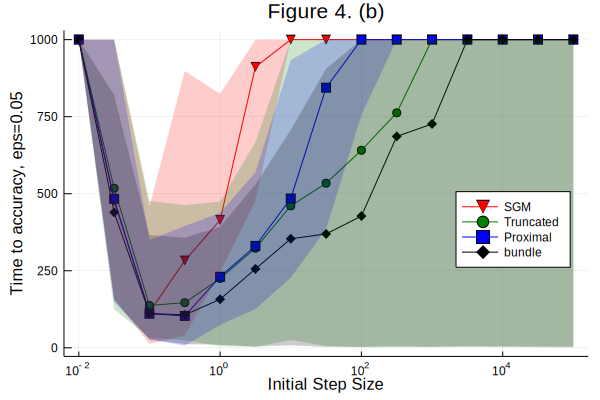

In [22]:
plt = plot(γinits, [sgm_iters[:,2] trunc_iters[:, 2] prox_iters[:, 2] bund_iters[:, 2]], 
    legend = :right,
    xscale = :log10,
    xlab = "Initial Step Size",
    ylab = "Time to accuracy, eps=0.05",
    title = "Figure 4. (b)",
    label = ["SGM" "Truncated" "Proximal" "bundle"],
    color = [:red :green :blue :black],
    markershape = [:dtriangle :circle :square :diamond])
a = Shape([γinits; γinits],
    [sgm_iters[:,1]; sgm_iters[:,3]])
plot!(a, fillalpha = 0.2, linecolor = nothing, fillcolor = :red, label = "")
b = Shape([γinits; γinits[end:-1:2]],
    [trunc_iters[:,1]; trunc_iters[end:-1:2,3]])
plot!(b, fillalpha = 0.2, linecolor = nothing, fillcolor = :green, label = "")
c = Shape([γinits; γinits[end:-1:2]],
    [prox_iters[:,1]; prox_iters[end:-1:2,3]])
plot!(c, fillalpha = 0.2, linecolor = nothing, fillcolor = :blue, label = "")
d = Shape([γinits; γinits[end:-1:2]],
    [bund_iters[:,1]; bund_iters[end:-1:2,3]])
plot!(d, fillalpha = 0.2, linecolor = nothing, fillcolor = :black, label = "")